In [1]:
from skimage import feature
from skimage.util import img_as_ubyte
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_raw = cv2.imread('02_80-100s__crop256px_5_5.bmp')

In [3]:
type(image_raw)

numpy.ndarray

In [4]:
image_gb = cv2.GaussianBlur(image_raw,(5,5), cv2.BORDER_DEFAULT)

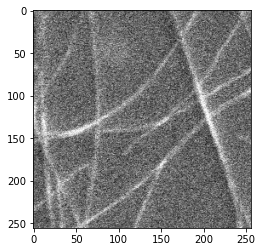

In [5]:
plt.imshow(image_raw)
plt.show()

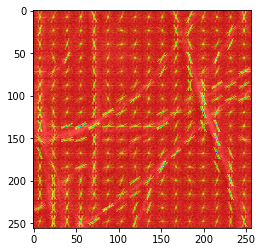

In [6]:
#hog
(hog, hog_image) = feature.hog(image_gb, orientations=9, 
                    pixels_per_cell=(16, 16), cells_per_block=(2, 2), 
                    block_norm='L2-Hys', visualize=True, transform_sqrt=True)

plt.imshow(image_raw)
plt.imshow(hog_image,alpha=0.7, cmap='hsv')


plt.show()
#plt.imwrite('hog_gb.jpg', hog_image*255)

In [7]:
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

In [8]:
# Convert to float: Important for subtraction later which won't work with uint8
image_f = img_as_float(image_raw)
image = gaussian_filter(image_f, 2.5)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

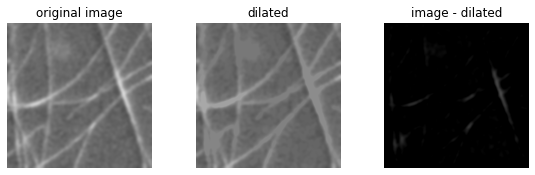

In [9]:
# filtering regional maxima
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
#ax1.imshow(dilated,vmin=0,vmax=255,cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')
subt=image-dilated
ax2.imshow(subt, vmin=subt.min(), vmax=subt.max(), cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()
fig.savefig('image-dilated.png')

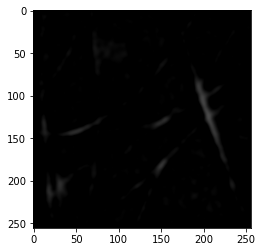

In [10]:
plt.imshow(subt, cmap = 'jet')
plt.show()

In [11]:
subt_ubyte = img_as_ubyte(subt)

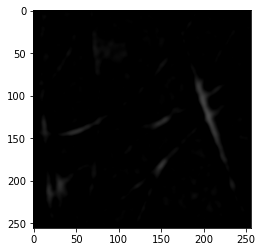

In [12]:
plt.imshow(subt_ubyte, cmap = 'jet')
plt.show()

In [13]:
h = image.min()
seed = image - h
dilated = reconstruction(seed, mask, method='dilation')
hdome = image - dilated

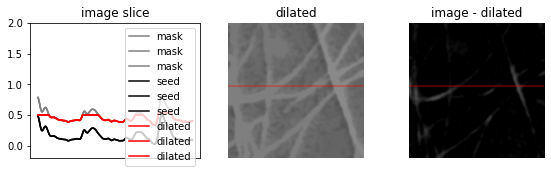

In [14]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(8, 2.5))
yslice = 120

ax0.plot(mask[yslice], '0.5', label='mask')
ax0.plot(seed[yslice], 'k', label='seed')
ax0.plot(dilated[yslice], 'r', label='dilated')
ax0.set_ylim(-0.2, 2)
ax0.set_title('image slice')
ax0.set_xticks([])
ax0.legend()

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.axhline(yslice, color='r', alpha=0.4)
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(hdome, cmap='gray')
ax2.axhline(yslice, color='r', alpha=0.4)
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()
plt.show()